<a href="https://colab.research.google.com/github/shouryashashank/cfar10-cnn-keras/blob/master/cfar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten ,Activation, regularizers
from keras.regularizers import l2
from keras.callbacks import Callback, LearningRateScheduler, TensorBoard, ModelCheckpoint
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

## Import the Data
The CIFAR10 dataset comes bundled with Keras. We will use the load_data function to load it into memory

In [0]:
from keras.datasets import cifar100
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

## Explore the Data
Check out the number of images in training and test data and also the number of classes and some sample images

In [0]:
from keras.utils import to_categorical

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  100
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Text(0.5,1,'Ground Truth : [49]')

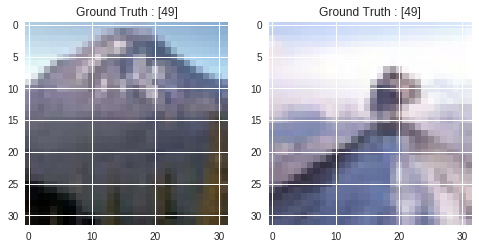

In [0]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[8,4])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[88,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[88]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


## Preprocess the Data
Perform normalization of data and convert the labels to categorical variables to be used in Keras

In [0]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [0]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [19]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Define the Model
Create the model with conv layer, max pooling layer, dropout layer and Dense layer

In [0]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Activation('elu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    
    
    return model

# def cm2():
#   model = Sequential()
#   #model.add(ZeroPadding2D(4, input_shape=x_train.shape[1:]))
#   # Stack 1:
#   model.add(Conv2D(384, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
#   model.add(Activation('elu'))
#   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#   model.add(Dropout(INIT_DROPOUT_RATE))
#   # Stack 2:
#   model.add(Conv2D(384, (1, 1), padding='same', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
#   model.add(Conv2D(384, (2, 2), padding='same', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
#   model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Activation('elu'))
#   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#   model.add(Dropout(INIT_DROPOUT_RATE))
#   # Stack 3:
#   model.add(Conv2D(640, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Activation('elu'))
#   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#   model.add(Dropout(INIT_DROPOUT_RATE))
#   # Stack 4:
#   model.add(Conv2D(768, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Activation('elu'))
#   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#   model.add(Dropout(INIT_DROPOUT_RATE))
#   # Stack 5:
#   model.add(Conv2D(896, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Activation('elu'))
#   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#   model.add(Dropout(INIT_DROPOUT_RATE))
#   # Stack 6:
#   model.add(Conv2D(1024, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Conv2D(1152, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Activation('elu'))
#   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#   model.add(Dropout(INIT_DROPOUT_RATE))
#   # Stack 7:
#   model.add(Conv2D(1152, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
#   model.add(Activation('elu'))
#   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#   model.add(Dropout(INIT_DROPOUT_RATE))
#   model.add(Flatten())
#   model.add(Dense(NUM_CLASSES))
#   model.add(Activation('softmax'))
m=createModel()

m.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_274 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_275 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_276 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_277 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_95 (Dropout)         (None, 15, 15, 32)        0         
__________

## Train the model

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-01-21 14:01:22--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.172.177.65, 34.232.40.183, 34.226.180.131, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.172.177.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  3.47MB/s    in 1.5s    

2019-01-21 14:01:25 (3.47 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://eb5bfb4e.ngrok.io


In [0]:
model1 = createModel()
batch_size = 256
epochs = 500
MODEL_PATH= "m.h5"
checkpointer = ModelCheckpoint(MODEL_PATH, save_best_only=True)
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=batch_size,
                         write_images=True)
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs,callbacks=[ checkpointer , tbCallBack ], verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_334 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_335 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_336 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_337 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_115 (Dropout)        (None, 15, 15, 32)        0         
__________

truth:  [95]
(32, 32, 3)
prediction:  [40]


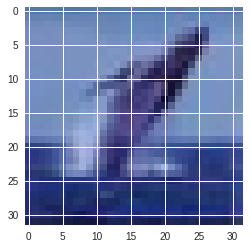

In [0]:
a=test_images[145,:,:]
plt.imshow(a, cmap='gray')
print("truth: ",test_labels[145])
print(a.shape)
i= a.reshape(1,32,32,3)
t=model1.predict_classes(i)
print("prediction: ",t)
if t==0:
  print("airplane")
if t==1:
  print("automobile")
if t==2:
  print("bird")
if t==3:
  print("cat")
if t==4:
  print("deer")
if t==5:
  print("dog")  
if t==6:
  print("frog")
if t==7:
  print("horse")  
if t==8:
  print("ship")
if t==9:
  print("truck")
  

In [0]:
img = Image.open("5.jpg") 
width, height = img.size 
print(width)
print(height)
img = img.resize((width, width))  
width, height = img.size 
print(width)
print(height)
img = img.resize((28, 28))  
width, height = img.size 
print(width)
print(height)

NameError: ignored

In [0]:
from keras.models import load_model

model1.save('my_model.h5')  

## Check the loss and accuracy curves

Text(0.5,1,'Loss Curves')

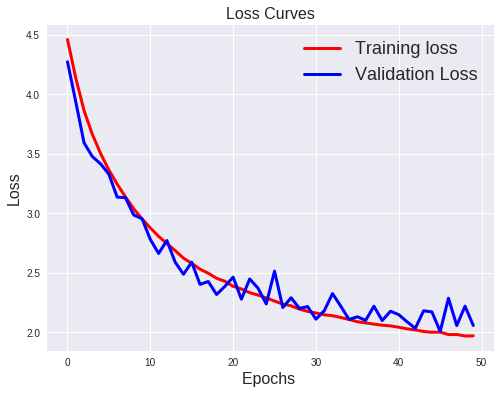

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

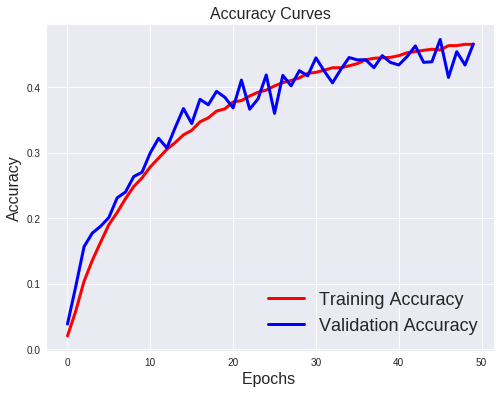

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Train using Data Augmentation
Here we use the ImageDataGenerator class in Keras to perform Data Augmentation. We perform horizontal and vertical shift of the image and also flipping the image randomly.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

model2 = createModel()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 256
epochs = 50
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


# datagen.fit(train_data)

# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)

model2.evaluate(test_data, test_labels_one_hot)

Epoch 1/50
196/196 [==============================] - 32s 166ms/step - loss: 2.0835 - acc: 0.2325 - val_loss: 1.8228 - val_acc: 0.3255
Epoch 2/50
196/196 [==============================] - 30s 152ms/step - loss: 1.7647 - acc: 0.3518 - val_loss: 1.6824 - val_acc: 0.4030
Epoch 3/50
196/196 [==============================] - 30s 153ms/step - loss: 1.5943 - acc: 0.4182 - val_loss: 1.5507 - val_acc: 0.4385
Epoch 4/50
196/196 [==============================] - 30s 154ms/step - loss: 1.4742 - acc: 0.4671 - val_loss: 1.4079 - val_acc: 0.5058
Epoch 5/50
196/196 [==============================] - 30s 154ms/step - loss: 1.3773 - acc: 0.5054 - val_loss: 1.1829 - val_acc: 0.5682
Epoch 6/50
196/196 [==============================] - 31s 157ms/step - loss: 1.3113 - acc: 0.5274 - val_loss: 1.1844 - val_acc: 0.5662
Epoch 7/50
196/196 [==============================] - 31s 158ms/step - loss: 1.2508 - acc: 0.5564 - val_loss: 1.1338 - val_acc: 0.5882
Epoch 8/50
196/196 [==============================] - 3

[0.8307213270187378, 0.7313]

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Losmodel2.samodel2.model2
s'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

SyntaxError: ignored

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
from keras.models import load_model

model2.save('my_model2.h5')  

In [0]:
img = Image.open("c.jpg") 
width, height = img.size 
print(width)
print(height)
img = img.resize((width, width))  
width, height = img.size 
print(width)
print(height)
img = img.resize((32,32))  
width, height = img.size 
print(width)
print(height)
a = np.array(img)
plt.imshow(a, cmap='gray')
print(a.shape)
i= a.reshape(1,32,32,3)
t=model2.predict_classes(i)
print("prediction: ",t)
if t==0:
  print("airplane")
if t==1:
  print("automobile")
if t==2:
  print("bird")
if t==3:
  print("cat")
if t==4:
  print("deer")
if t==5:
  print("dog")  
if t==6:
  print("frog")
if t==7:
  print("horse")  
if t==8:
  print("ship")
if t==9:
  print("truck")